In [1]:
# Copyright 2020 Alex Khan
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""
Things to do:
 - Please name this file <demo_name>.py
 - Fill in [yyyy] and [name of copyright owner] in the copyright (top line)
 - Add demo code below
 - Format code so that it conforms with PEP 8
"""

import numpy as np
from numpy.random import rand
import pandas as pd
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from minorminer import find_embedding
import networkx as nx
import dwave.inspector
import dimod
import neal

In [3]:
# Random matrix is generated
dim=20
Q =  2*rand(dim,dim) - 1
Q = (Q+Q.T)/2
for k in range(dim):
    Q[k,k] = np.abs(Q[k,k])

#print(Q)

In [4]:
# Copy in Matrix from File
Q = pd.read_csv("Q20.csv").values
dim=len(Q[0])

#print(Q)

In [19]:
# convert matrix into a QUBO with linear=biases and quadratic=couplings terms
# This uses the D-Wave QPU to 

linear={('a'+str(k), 'a'+str(k)):Q[k][k] for k in range(dim)}

quadratic={('a'+str(i+1), 'a'+str(j)):Q[i+1][j] for i in range(dim-1) for j in range(dim-1) if j<i+1}

QDwave = dict(linear)
QDwave.update(quadratic)

#print(QDwave)

chainstrength = 1
numruns = 1000



sampler = EmbeddingComposite(DWaveSampler())


response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns)

#print(response)
#dwave.inspector.show(QDwave,response)

In [ ]:
# print results in binary

title_str=[]
for a in range(dim):
        title_str.append('a'+str(a))
print(title_str, "Energy")
for sample, energy, n_occurences, chain_break_freq in response.data():
    sample_str=[]
    for a in range(dim):
        sample_str.append(str(sample['a'+str(a)]))
    print(sample_str, energy)

In [20]:
# print qubits with value 1
best=0
for sample, energy, n_occurences, chain_break_freq in response.data():
    sample_list=[]
    for a in range(dim):
        #sample_str.append(str(sample['a'+str(a)]))
        if sample['a'+str(a)]==1:
            sample_list.append(a)
    if best==0:
        best_DWave_val='best D-Wave:'+str(sample_list)+' energy:'+str(energy)+' occurences:'+str(n_occurences)
        best=1
    print(sample_list, energy, n_occurences)
    break #comment out break to see all values
print(best_DWave_val)   

   

[0, 1, 3, 4, 6, 12, 18, 19] -7.2996 37
best D-Wave:[0, 1, 3, 4, 6, 12, 18, 19] energy:-7.2996 occurences:37


In [25]:
def ProbabilisticSamplerQ(Q,plot_limit):
    from itertools import combinations
    import numpy as np
    import pandas as pd
    import random
    import math
    import matplotlib.pyplot as plt
    
    def nCr(n,r):
        f = math.factorial
        return int(f(n) / f(r) / f(n-r))
    
    def random_combination(iterable, r):
        "Random selection from itertools.combinations(iterable, r)"
        pool = tuple(iterable)
        n = len(pool)
        indices = sorted(random.sample(range(n), r))
        return list(tuple(pool[i] for i in indices))
    
    def sum(i_list, Q):
        sum_l=0
        sum_q=0
        for i in (i_list):
            sum_l+=Q[i][i]
        for i in (i_list):
            for j in (i_list):
                if i<j:
                    sum_q+=Q[i][j]
            
        return(sum_l+sum_q)
    
    
    N=len(Q[0])
    t= (2**N)-1
    
    e_min=9999999
    count=1
    min_list=[]
    plot_data=[]
    for n in range(1,N):  # for groups of items from 1 to N
        comb=nCr(N,n)
        #print('--m ', m, comb)
        if comb>plot_limit:
            combf=plot_limit
        else:
            combf=comb
                
        for i in range (combf):
            i_list=random_combination(range(N), n)
            plot_data.append(sum(list(i_list),Q))
            
            if sum(list(i_list),Q)<e_min:  

                    e_min=sum(list(i_list),Q)  
                    
                    min_list=list(i_list)
                    print(list(i_list), sum(list(i_list),Q))
            count+=1
    plt.plot(plot_data)
    plt.ylabel('Energy')
    plt.show()
    
    print('Best found:', min_list)
    print('Energy:', e_min)
    print('From:', count, ' samples')
    print('Possible solutions:', t)
    return

[0] -0.4966
[14] -0.6697
[19] -0.7553
[18] -0.8
[3, 13] -1.2581
[4, 14] -1.5337999999999998
[4, 18] -1.9498
[1, 18] -1.9504000000000001
[4, 9, 13] -2.4194
[4, 13, 19] -2.7816
[1, 3, 16, 19] -3.1766
[0, 4, 14, 18] -3.3583000000000007
[1, 6, 7, 18, 19] -3.569
[1, 4, 16, 18, 19] -4.7878
[1, 2, 4, 13, 15, 16, 18] -5.1903999999999995
[0, 1, 2, 4, 6, 7, 18, 19] -5.3854
[0, 1, 2, 4, 9, 16, 18, 19] -6.0578
[0, 1, 2, 3, 4, 12, 16, 18, 19] -6.4223


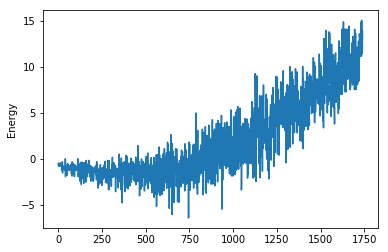

Best found: [0, 1, 2, 3, 4, 12, 16, 18, 19]
Energy: -6.4223
From: 1741  samples
Possible solutions: 1048575


In [28]:
ProbabilisticSamplerQ(Q,100)

In [16]:
print(best_DWave_val) 

best D-Wave:[0, 1, 3, 4, 6, 12, 18, 19] energy:-7.2996 occurences:2


In [ ]:
# Next few lines can be used to check on D-Wave Simulated Annealer results

In [6]:
# Use Simulated Annealer to show results
Nsampler = neal.SimulatedAnnealingSampler()
QDWaveSA = dimod.BinaryQuadraticModel(Q, dimod.BINARY)
SAresponse = Nsampler.sample(QDWaveSA)
for Ssample in SAresponse.data():
    print( Ssample)

Sample(sample={0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 1}, energy=-9.96089999999997, num_occurrences=1)


In [11]:
best=0
for sample, energy, n_occurences in SAresponse.data():
    sample_list=[]
    for a in range(dim):
        #sample_str.append(str(sample['a'+str(a)]))
        if sample[a]==1:
            sample_list.append(a)
    if best==0:
        best_SA_val='best SA:'+str(sample_list)+' energy:'+str(energy)+' occurences:'+str(n_occurences)
        best=1
    
print(best_SA_val)   

best SA:[0, 1, 4, 6, 12, 18, 19] energy:-9.96089999999997 occurences:1


In [22]:
def value(i_list, file_name):
    import pandas as pd
    Q = pd.read_csv(file_name).values
    N=len(Q[0])
    t= (2**N)-1
    sum_l=0
    sum_q=0
    for i in (i_list):
        sum_l+=Q[i][i]
    for i in (i_list):
        for j in (i_list):
            if i<j:
                sum_q+=Q[i][j]

    return(sum_l+sum_q)

In [24]:
value([0, 1, 3, 4, 6, 12, 18, 19],"Q20.csv")

-7.2996